In [1]:
# library for mathematical functions and data preprocessing such as table, etc
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import skew

# Library for visualizing data
import matplotlib.pyplot as plt
import seaborn as sns

# Library for machine learning functions/algorithms
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score,  precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline


In [2]:
# data itself
url = 'lending_club_loan_two.csv'
# description of each column
url_info = 'lending_club_info.csv'
df_before = pd.read_csv(url)
df_info = pd.read_csv(url_info)
df_before.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [3]:
df_before.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [4]:
# Reason:
# These features lack direct relevance to a person's ability to secure a loan. 
# grade and subgrade, summarizes the loan status, can be substituted with existing data like interest rates and annual income

columns_to_drop = ['emp_title', 'address', 'issue_d', 'title', 'earliest_cr_line', 'initial_list_status', 'grade', 'sub_grade', 'purpose']
df_before = df_before.drop(columns=columns_to_drop)

### Label Encoding (LOAN STATUS GA HARUS DI ENCODE)

In [5]:
# label encoder and fit_transform is a function that changes/remap string into number based on alphabetical order
le = LabelEncoder() 
df_before['term'] = le.fit_transform(df_before['term'])
# 36 months = 0,  60 months = 1

df_before['emp_length'] = le.fit_transform(df_before['emp_length'])
# '1 year' = 0, '10+ years' = 1, '2 years' = 2, '3 years' = 3, '4 years' = 4, '5 years' = 5,   
# '6 years' = 6, '7 years' = 7, '8 years' = 8,  '9 years' = 9, '< 1 year' = 10

df_before['home_ownership'] = le.fit_transform(df_before['home_ownership'])
# 'ANY' = 0, 'MORTGAGE' = 1, 'NONE' = 2, 'OTHER' = 3, 'OWN' = 4, 'RENT' = 5

df_before['verification_status'] = le.fit_transform(df_before['verification_status'])
# 'Not Verified' = 0, 'Source Verified' = 1, 'Verified' = 2

df_before['loan_status'] = le.fit_transform(df_before['loan_status'])
# 'Charged Off' = 0, 'Fully Paid' = 1 

df_before['application_type'] = le.fit_transform(df_before['application_type'])
# 'DIRECT_PAY' = 0, 'INDIVIDUAL' = 1, 'JOINT' = 2

In [6]:
df_before['emp_length'].fillna(df_before['emp_length'].median(), inplace=True)
df_before['pub_rec_bankruptcies'].fillna(df_before['pub_rec_bankruptcies'].median(), inplace=True)
df_before['mort_acc'].fillna(df_before['mort_acc'].median(), inplace=True)
df_before['revol_util'].fillna(df_before['revol_util'].mean(), inplace=True)

In [7]:
z_score_vars = ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'total_acc']

no_outlier = df_before.copy()

# Store outlier counts and percentages for each column
outlier_info = {}

for col in z_score_vars:
    # since our dataset is skewed we use the 99 percentile formula to detect and delete outliers, only identifying extreme datas
    lower_limit = df_before[col].quantile(0.01)
    upper_limit = df_before[col].quantile(0.99)

    # Count outliers before clipping
    outlier_count = ((df_before[col] < lower_limit) | (df_before[col] > upper_limit)).sum()
    total_count = len(df_before[col])
    outlier_percentage = outlier_count / total_count * 100

    # Store outlier information for the column
    outlier_info[col] = {'count': outlier_count, 'percentage': outlier_percentage}

# Print outlier information for each column
print("Outlier information:")
for col, info in outlier_info.items():
    print(f"- {col}: {info['count']} outliers ({info['percentage']:.2f}%)")

# Drop rows with outliers
for col in z_score_vars:
    lower_limit = df_before[col].quantile(0.01)
    upper_limit = df_before[col].quantile(0.99)
    no_outlier = no_outlier[(no_outlier[col] >= lower_limit) & (no_outlier[col] <= upper_limit)]

Outlier information:
- loan_amnt: 4089 outliers (1.03%)
- int_rate: 7823 outliers (1.98%)
- installment: 7916 outliers (2.00%)
- annual_inc: 7237 outliers (1.83%)
- dti: 7905 outliers (2.00%)
- open_acc: 5372 outliers (1.36%)
- pub_rec: 2543 outliers (0.64%)
- revol_bal: 7918 outliers (2.00%)
- total_acc: 7553 outliers (1.91%)


In [8]:
#  SPLIT
target_column = 'loan_status'
feature_columns = no_outlier.columns[no_outlier.columns != target_column]

X = no_outlier[feature_columns]
y = no_outlier[target_column]

In [9]:
# use the pareto priuncple 
# split 80 train 10 validate 10 test

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=0)

X_validation, X_test, y_validation, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0)

#### RANDOM SAMPLING

In [10]:
# Undersample majority class by half
rus = RandomUnderSampler(sampling_strategy=0.5, random_state=0)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

# # Oversample minority class by 2 times using SMOTE
# # smote = SMOTE(sampling_strategy=1, random_state=0)  # Set sampling_strategy to 2
# # X_train_resampled, y_train_resampled = smote.fit_resample(X_train_rus, y_train_rus)

from imblearn.over_sampling import RandomOverSampler
# Instantiate the RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train_rus, y_train_rus)

# Now X_resampled and y_resampled contain the randomly oversampled data


In [11]:
data = y_train.value_counts()
print(data)

loan_status
1    225416
0     54117
Name: count, dtype: int64


In [12]:
data_counts = y_train_resampled.value_counts()
print(data_counts)

loan_status
0    108234
1    108234
Name: count, dtype: int64


In [13]:
# Hyper Paramaters:
# n estimator (value to be determined by using a for loop while checking  accuracy score)
# bootstrap value true (to validate test result by using selecting random data)
# criterion value gini (Computational Efficiency as we have a large dataset and is less sensitive to outliers)
# max depth value none( to use all variables as it is currently not overfitting)
# max features value all/auto (use all to diversify tree, create more robust)

clf = RandomForestClassifier(n_estimators=100, bootstrap=True, criterion='gini', max_depth=None,  random_state=0)

# Train the classifier on the training set
clf.fit(X_train_resampled, y_train_resampled)

# Make predictions on the validation set
y_pred_validation = clf.predict(X_validation)

# Evaluate the accuracy on the validation set
accuracy_validation = accuracy_score(y_validation, y_pred_validation)
print(f'Validation Accuracy: {accuracy_validation}')

# Make predictions on the test set
y_pred_test = clf.predict(X_test)

# Evaluate the accuracy on the test set
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f'Test Accuracy: {accuracy_test}')


Validation Accuracy: 0.7405414687195925
Test Accuracy: 0.7390819071604373


# Threshold filter data only use the ones that is above trheshold

In [14]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Assuming you have already imported necessary libraries and defined clf, X_test, y_test, and y_pred_test

def filter_data_by_threshold(clf, X_test, y_test, threshold):
    # Predict probabilities and create a DataFrame
    temp = pd.DataFrame(clf.predict_proba(X_test).tolist(), columns=clf.classes_)
    temp['max_prob'] = temp.max(axis=1)
    
    # Reset the index before filtering
    temp.reset_index(drop=True, inplace=True)

    # Filter data based on the threshold
    idx = temp[temp['max_prob'] >= threshold].index
    
    # Create a new DataFrame with filtered data
    filtered_data = temp.loc[idx].copy()
    
    # Display filtered data
    print("Filtered Data:")
    print(filtered_data)
    
    # If y_test is a NumPy array, use array slicing
    accuracy_test = accuracy_score(y_test[idx], y_pred_test[idx])
    
    print("Accuracy on filtered data:", accuracy_test)
    print("Proportion of data kept:", len(idx) / len(y_test))
    
    return filtered_data, y_test[idx], y_pred_test[idx]

# Set the threshold you want to use
threshold = 0.6

# Convert y_test to a NumPy array if it's not already
y_test = np.array(y_test)

# Call the function with the specified threshold
filtered_data, y_test_filtered, y_pred_test_filtered = filter_data_by_threshold(clf, X_test, y_test, threshold)

# Calculate confusion matrix, classification report, and other metrics
conf_matrix = confusion_matrix(y_test_filtered, y_pred_test_filtered)
classification_rep = classification_report(y_test_filtered, y_pred_test_filtered, output_dict=True)

print("Confusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(classification_rep)

# Access F1 score and recall from the classification report
f1 = classification_rep['weighted avg']['f1-score']
recall = classification_rep['weighted avg']['recall']

print("\nF1 Score:", f1)
print("Recall:", recall)


Filtered Data:
          0     1  max_prob
1      0.33  0.67      0.67
2      0.31  0.69      0.69
3      0.25  0.75      0.75
4      0.36  0.64      0.64
5      0.35  0.65      0.65
...     ...   ...       ...
34937  0.33  0.67      0.67
34938  0.21  0.79      0.79
34939  0.23  0.77      0.77
34940  0.14  0.86      0.86
34941  0.34  0.66      0.66

[24746 rows x 3 columns]
Accuracy on filtered data: 0.8109593469651661
Proportion of data kept: 0.70820216358537
Confusion Matrix:
[[ 1541  2519]
 [ 2159 18527]]

Classification Report:
{'0': {'precision': 0.4164864864864865, 'recall': 0.3795566502463054, 'f1-score': 0.3971649484536082, 'support': 4060.0}, '1': {'precision': 0.8803097975862396, 'recall': 0.8956298946147153, 'f1-score': 0.8879037668935109, 'support': 20686.0}, 'accuracy': 0.8109593469651661, 'macro avg': {'precision': 0.648398142036363, 'recall': 0.6375932724305103, 'f1-score': 0.6425343576735596, 'support': 24746.0}, 'weighted avg': {'precision': 0.804211735553386, 'recall'

#### THRESHOLD based on the positive class makanya ada [:,1], if probability higher than threshold the it it the positive class

In [15]:
predicted_probabilities = clf.predict_proba(X_test)[:, 1]

# Adjust the threshold and make predictions
new_threshold = 0.8 # You can adjust this threshold value
y_pred_test_adjusted = (predicted_probabilities >= new_threshold).astype(int)

accuracy_test_adjusted = accuracy_score(y_test, y_pred_test_adjusted)
print(f'Test Accuracy (Adjusted Threshold): {accuracy_test_adjusted}')

precision_adjusted = precision_score(y_test, y_pred_test_adjusted)
print("Precision (Adjusted Threshold):", precision_adjusted)

# Calculate Recall with the adjusted threshold
recall_adjusted = recall_score(y_test, y_pred_test_adjusted)
print("Recall (Adjusted Threshold):", recall_adjusted)

# Calculate F1 Score with the adjusted threshold
f1_adjusted = f1_score(y_test, y_pred_test_adjusted)
print("F1 Score (Adjusted Threshold):", f1_adjusted)

Test Accuracy (Adjusted Threshold): 0.35401522523038176
Precision (Adjusted Threshold): 0.9326625386996904
Recall (Adjusted Threshold): 0.21394077125204175
F1 Score (Adjusted Threshold): 0.3480445959216683


In [16]:
cm2 = confusion_matrix(y_test, y_pred_test_adjusted)
print("Confusion Matrix\n", cm2)

target_names = ['Charged Off', 'Fully Paid']
print(classification_report(y_test, y_pred_test_adjusted, target_names=target_names))

Confusion Matrix
 [[ 6345   435]
 [22137  6025]]
              precision    recall  f1-score   support

 Charged Off       0.22      0.94      0.36      6780
  Fully Paid       0.93      0.21      0.35     28162

    accuracy                           0.35     34942
   macro avg       0.58      0.57      0.35     34942
weighted avg       0.79      0.35      0.35     34942



Confusion Matrix
 [[ 2885  3895]
 [ 5222 22940]]

### AUC Score (BELUM SELESAI)

##### JESALIN APA ITU DAN HASIL?

To validate the robustness of our model, we utilize the roc_auc_score function from sk-learn where it automatically calculates the AUC score. A higher AUC signifies better discrimination ability, reinforcing the findings from the confusion matrix and F1 score. The AUC serves as a confirmation metric, providing a holistic view of the model's performance across different threshold values.

AUC Score: 0.6943759022545286


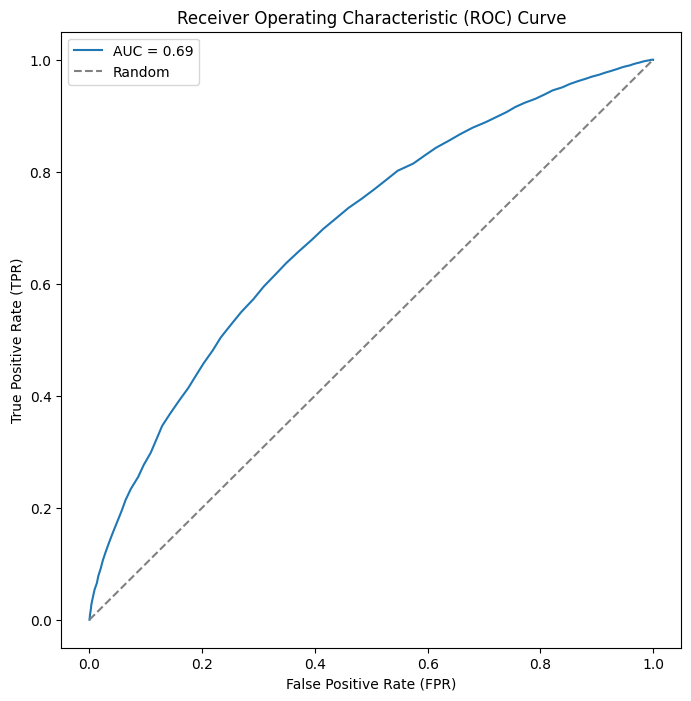

In [17]:
# Assuming you have the predicted probabilities for the positive class
y_prob_test = clf.predict_proba(X_test)[:, 1]

# Calculate AUC score
auc_score = roc_auc_score(y_test, y_prob_test)
print("AUC Score:", auc_score)

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_test)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend()
plt.show()

# is 69 auc score good what does it mean, what can i do to increase it?

## Conclusion???

# I THINK THERE IS INHERIT BIAS IN MY DATASET CONSIDERTING ALL FUCKING METHOD DOES NOT HELP THE IMBALANCE

# feature importance (tried many differnet columns), outliers, scaling ga pengaruh

# Cara over n undersampling lumayan pengaruh, adasyn method jelek, over sampling only higher accuracy than over and under SMOTE AND RANDOM GA NGEFEK

# COST SENSITIVE WEIGHT DOES NOT HELP, lowers accuracy, increase tn, fp, reduce fn, tp

# PCA BAD transformation ttp tn lebih dikit dri fn fp, other transformation juga ga bisa naikin

# SVM 3 jam ga selesai jadi ga mungkin, NN accuracy ga beda,pake model lain apa lagi yg bisa? 

In [98]:
# Confusion Matrix BOTH OVER AND UNDER
#  [[ 2885  3895]
#  [ 5222 22940]]
#              precision    recall  f1-score   support

#  Charged Off       0.36      0.43      0.39      6780
#   Fully Paid       0.85      0.81      0.83     28162

#     accuracy                           0.74     34942
#    macro avg       0.61      0.62      0.61     34942
# weighted avg       0.76      0.74      0.75     34942

# Accuracy: 0.7390819071604373
# Precision: 0.8548537357928079
# Recall: 0.8145728286343299
# Specificity: 0.42551622418879054
# F1 Score: 0.8342273214902631

# -----------------------------------------------------------

# Confusion Matrix OVERSAMPLING ONLY
#  [[ 1150  5630]
#  [ 1443 26719]]
#               precision    recall  f1-score   support
#  Charged Off       0.44      0.17      0.25      6780
#   Fully Paid       0.83      0.95      0.88     28162
#     accuracy                           0.80     34942
#    macro avg       0.63      0.56      0.56     34942
# weighted avg       0.75      0.80      0.76     34942

# Accuracy: 0.7975788449430484
# Precision: 0.8259606170206188
# Recall: 0.9487607414246148
# Specificity: 0.1696165191740413
# F1 Score: 0.8831121614251956

# Determining the better confusion matrix for loan approval depends on your priorities and the costs associated with different types of errors.

# Here's a breakdown of key metrics and considerations for each matrix:

# Matrix PT:

# Accuracy: 74%
# Precision (Charged Off): 35%
# Recall (Charged Off): 38%
# F1-score (Charged Off): 36%
# Strengths: Better at identifying charged-off loans (higher recall), potentially reducing losses from defaults.
# Weaknesses: Lower overall accuracy and precision, potentially leading to missed opportunities for good loans.
# Matrix ALP:

# Accuracy: 80%
# Precision (Charged Off): 44%
# Recall (Charged Off): 17%
# F1-score (Charged Off): 25%
# Strengths: Higher overall accuracy, approves more loans, and potentially increases profits.
# Weaknesses: Misses more charged-off loans (lower recall), potentially increasing losses from defaults.
# Considerations:

# Cost of False Negatives (Charged Off): If approving a charged-off loan is very costly, prioritize recall and lean towards PT.
# Cost of False Positives (Fully Paid): If denying a fully paid loan incurs significant opportunity costs, prioritize precision and lean towards ALP.
# Risk Tolerance: If risk tolerance is low, ALP might be preferred due to higher overall accuracy.
# Business Objectives: Balance profit goals with credit risk management.
# Additional Insights:

# F1-score: Consider this as a balanced measure of precision and recall, especially for the "Charged Off" class.
# Cost-Sensitive Analysis: Assign specific costs to each type of error to make a more informed decision.
# Explore Alternative Models: Investigate other models that might achieve a better balance between accuracy, precision, and recall for your specific needs.
# Ultimately, the best choice depends on your specific business context and risk tolerance.